# 신경망 데이터 표현

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])


## 텐서(Tensor)
- 일반적으로 텐서는 3차원 이상을 다룰 때 표현하는 방식이지만, 여기서는 어떠한 데이터를 표현할 때, 그 값 모두를 텐서라고 부르기로 함

      a = np.array([1, 2])
      b = np.array([[1, 2],
                    [3, 4]])
      c = np.array([10]) 
      d = np.array(3)   # 스칼라
  
    a, b, c, d 모두 텐서라고 지칭할 수 있음
  
- 랭크(rank): 텐서의 축(Axis : x, y, z)을 나타내고, 넘파이(numpy)의 `ndim`으로 구할 수 있음

      a = np.array([1, 2])
        >> ndim = 1  
      b = np.array([[1, 2],
                    [3, 4]])
        >> ndim = 2
      d = np.array(3)
        >> ndim = 0
      
    위의 예시에서 알 수 있듯이 대괄호( [ ] )의 개수가 곧 랭크(축)의 값
    
      
- 크기(shape): 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타내며, 파이썬의 튜플(tuple) 형태



## 그림으로 이해하기 ![array](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png)<br />


<sub>출처: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch01.html</sub>

## 스칼라(0차원 텐서)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 형상은 없음

In [ ]:
 x = np.array(3)
 print(x)
 print(x.shape)
 print(np.ndim(x))

3
()
0


## 벡터 (1차원 텐서)

 + 숫자의 배열을 나타내는 텐서

In [ ]:
x = np.array([1, 2, 3, 4])
print(x)
print(x.shape)
print(np.ndim(x))

[1 2 3 4]
(4,)
1


### 벡터의 합

+ 같은 형상(Shape) 일 때, 각 원소별 로 계산

In [ ]:
x = np.array([1, 2, 3, 4])  # shape 4 * 1, 1 dimension
y = np.array([5, 6, 7, 8])

z = x + y
print(z)
print(z.shape)
print(np.ndim(z))

[ 6  8 10 12]
(4,)
1


### 벡터의 곱
-  $A = (x_1, \ x_2, \ x3, \ ..., \ x_n)$  
  $B = (y_1, \ y_2, \ y3, \ ..., \ y_n)$ 일 때,
- 원소곱
  - 같은 형상(shape)일 때, 각 원소별로 계산   
   
    $A \times B = (x_1, \ x_2, \ x_3, \ ..., \ x_n) \times (y_1, \ y_2, \ y_3, \ ..., \ y_n) \\   
    \qquad = (x_1y_1, \ x_2y_2, \ x_3y_3, \ ... \ ,  \ x_ny_n)  $
    
- 벡터곱(product, dot)
  - 두 1차원 벡터가 있을 때 **각각의 성분끼리의 곱을 모두 더하는 계산**  
  
$$
    A \bullet B \Rightarrow A \times B^T = (x_1, \ x_2, \ x_3, \ ..., \ x_n) \begin{pmatrix} y_1 \\ y_2 \\ y_3 \\ ... \\ y_n  \end{pmatrix} \\  
    \qquad = (x_1y_1 + \ x_2y_2 + \ x_3y_3 + \ ... + \ x_ny_n)  
$$


<sub> **전치행렬 위키 : https://ko.wikipedia.org/wiki/전치행렬** </sub>


In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7 ,8])

c = a * b # 벡터의 외적
print(c)
print(c.shape)
print(np.ndim(c))

print("---------------------------")
x = np.array([1, 2, 0])
y = np.array([0, 2, 1])
z = np.dot(x, y) # z는 scalar 가 출력된다. 벡터의 내적 

print(z)
print(z.shape)
print(np.ndim(z))

[ 5 12 21 32]
(4,)
1
---------------------------
4
()
0


#### 벡터의 내적 (內積 | inner product)

+ 적은 '쌓는다'는 뜻의 한자이고, 여기서는 '곱한다'는 뜻이다. 벡터의 곱하기는 두 가지 정의가 있는데, 내적은 벡터를 마치 수처럼 곱하는 개념이다.

+ 벡터에는 방향이 있으므로, 방향이 일치하는 만큼만 곱한다. 예를 들어 두 벡터의 방향이 같으면, 두 벡터의 크기를 그냥 곱한다. 두 벡터가 이루는 각이 90도일 땐, 일치하는 정도가 전혀 없기 때문에 내적의 값은 0이다. 내적은 한 벡터를 다른 벡터로 정사영 시켜서, 그 벡터의 크기를 곱한다.

&nbsp;![](https://wikidocs.net/images/page/22384/inner_product.png)

내적의 기호는 가운데 점을 찍는 것(⋅)이고, 벡터의 크기를 절대값으로 표시하면, 내적의 값은 다음과 같다.

+ $ \vec{a} \bullet \vec{b} = \lvert \vec{a} \rvert 
\lvert \vec{b} \rvert cos\theta$

#### 벡터의 외적 (外積 | outer product)


![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99C5D0345A2EA15C204EAB)

![](https://postfiles.pstatic.net/MjAxOTA5MjVfMTkz/MDAxNTY5NDE5OTkzOTE0.m3sVLzVgfzx2ef9BrxRw0Wmwb1iYT-FAEuCVbXie5Ysg.lyz9An7mWU3OD6DHfQZRUj9b0ny5OGgqidzerG7K8b4g.PNG.cdw0424/outer_product.png)


## 2차원 텐서(행렬)

- 2차원 텐서는 행렬로 생각할 수 있음    - (m, n) 형상의 배열 ![matrix](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Matrix_ko.svg/570px-Matrix_ko.svg.png)<br /><sub>출처: https://ko.wikipedia.org/wiki/%ED%96%89%EB%A0%AC</sub>

In [ ]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])

print(matrix)
print(matrix.shape)
print(np.ndim(matrix))
print('-------------------')

matrix1 = np.array([[1,2,3,4]])

print(matrix1)
print(matrix1.shape)
print(np.ndim(matrix1))

[[1 2 3]
 [4 5 6]]
(2, 3)
2
-------------------
[[1 2 3 4]]
(1, 4)
2


### 행렬 원소곱
- 같은 형상(shape)일 때 덧셈, 곱셈과 같은 연산은 원소별로 진행


In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[10, 10], [10, 10]])

print('A  \n', a)
print('B  \n', b)
print('A * B \n', a * b)

A  
 [[1 2]
 [3 4]]
B  
 [[10 10]
 [10 10]]
A * B 
 [[10 20]
 [30 40]]



### 행렬 점곱(내적, product)
- 1차원 벡터와 마찬가지로 앞 행렬의 열과 뒤 행렬의 행의 수가 같아야함

In [ ]:
m = np.array([[1, 2], [3, 4]]) # 2 * 2
n = np.array([[2, 3, 4],[2, 3, 4]]) # 2 * 3

print('M \n', m)
print('N \n', n)
L = np.dot(m, n)
print('L \n', L)
print(L.shape)
print(np.ndim(L))


M 
 [[1 2]
 [3 4]]
N 
 [[2 3 4]
 [2 3 4]]
L 
 [[ 6  9 12]
 [14 21 28]]
(2, 3)
2


In [ ]:
m = np.array([[1], [2], [3]])
n = np.array([[1], [2], [3]])

# np.dot(m, n) # 행렬 곱셈이 안되는 상황일 경우, 

### 역행렬
- 어떤 행렬 A가 있을 때, 곱해서 단위행렬(E)를 만드는 행렬 B가 존재한다면, 행렬 B는 A의 역행렬

In [ ]:
a = np.array([[1, 2], [3, 4]])
print(a) 

b = np.linalg.inv(a) # Inverse in NumPy linear algebra functions
print(b)
print(np.dot(a, b)) 

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [ ]:
# 역행렬이 존재하지않을때, 
B = np.array([[3, 3],[2, 2]])
# np.linalg.inv(B) exception 발생


LinAlgError: ignored

### 전치행렬
- 행과 열을 바꾼 배열의 형태

![](https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif)
<br /><sub>출처: https://ko.wikipedia.org/wiki/%EC%A0%84%EC%B9%98%ED%96%89%EB%A0%AC</sub>

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])

print('A\n', A)
print('A.Shape\n', A.shape)
print("----------------")
A_ = A.T
print('A의 전치행렬 \n', A_)
print('(A)^t Shape \n', A_.shape)

print('A.T.T\n', A_.T)

A
 [[1 2 3]
 [4 5 6]]
A.Shape
 (2, 3)
----------------
A의 전치행렬 
 [[1 4]
 [2 5]
 [3 6]]
(A)^t Shape 
 (3, 2)
(A.T.T
 [[1 2 3]
 [4 5 6]]


## 3차원 텐서
- 보통 이미지를 나타낼 때 사용되는 텐서
  - (width, height, channels)
  - 일반적으로 Numpy array로 표현  
![3d tensor](https://image.slidesharecdn.com/tensordecomposition-170301235239/95/a-brief-survey-of-tensors-5-638.jpg)
<br /><sub>출처: https://www.slideshare.net/BertonEarnshaw/a-brief-survey-of-tensors</sub>
- 시계열 데이터 또는 시퀀스(sequence) 데이터를 표현할 때도 사용
  - (samples, timesteps, features)
  - (예시) 주식 가격 데이터셋, 시간에 따른 질병 발병 건수  

![](https://kr.mathworks.com/help/deeplearning/ug/timeseriesforecastingusingdeeplearningexample_01_ko_KR.png)

<br /><sub>출처: https://kr.mathworks.com/help/deeplearning/examples/time-series-forecasting-using-deep-learning.html</sub>

In [ ]:
 x = np.array([[[5, 3, 2, 1], 
               [5, 5, 3, 1], 
               [2, 4, 3, 1]], 
              [[1, 1, 1, 1],
               [3, 5, 7, 8],
               [1, 8, 3, 4]], 
              [[10, 9 ,3, 9], 
               [4, 2, 1, 5], 
               [2, 4, 5, 6]]])
 
 print('X \n',x)
 print('X Shape \n', x.shape)
 print('X dimension \n', x.ndim)

X 
 [[[ 5  3  2  1]
  [ 5  5  3  1]
  [ 2  4  3  1]]

 [[ 1  1  1  1]
  [ 3  5  7  8]
  [ 1  8  3  4]]

 [[10  9  3  9]
  [ 4  2  1  5]
  [ 2  4  5  6]]]
X Shape 
 (3, 3, 4)
X dimension 
 3


In [ ]:
B = np.array([[[2, 3, 4],
      [2, 3, 4]],
     [[1, 1, 1],
      [1, 1, 1]
     ]])

 
print('B \n', B)
print('B Shape \n', B.shape)
print('B dimension \n', B.ndim)

print('B.T\n', B.T)

B 
 [[[2 3 4]
  [2 3 4]]

 [[1 1 1]
  [1 1 1]]]
B Shape 
 (2, 2, 3)
B dimension 
 3
B.T
 [[[2 1]
  [2 1]]

 [[3 1]
  [3 1]]

 [[4 1]
  [4 1]]]


### 3차원 텐서 활용 예시(이미지)
- MNIST Dataset
- 28x28 사이즈의 gray scale 이미지들로 구성  
![이미지](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png)  
<sub>출처: https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4</sub>

  
- gray scale: 0~255의 값을 통해 밝기를 표현 
  0으로 갈수록 어두워지고, 255로 갈수록 밝아짐 
![이미지](https://miro.medium.com/max/1400/1*euc4RxnNo78LFEGrb-QZ7w.jpeg)  
<sub>출처: https://medium.com/@himnickson/converting-rgb-image-to-the-grayscale-image-in-java-9e1edc5bd6e7</sub>


In [ ]:
from keras.datasets import mnist # 위의 이미지 예제데이터 가져와서 활용하는 예제

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.ndim)

3


In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
print(train_images.dtype)

uint8


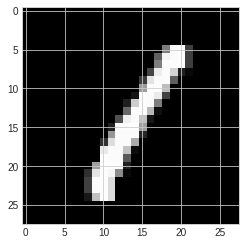

In [ ]:
temp_image = train_images[3]
plt.imshow(temp_image, cmap='gray')
plt.show()


## 브로드캐스팅(broadcasting)
- 넘파이에서 다른 형상(shape)끼리 계산 가능 
- 1차원 텐서 

![1d](https://numpy.org/doc/1.18/_images/theory.broadcast_1.gif)

- 2차원 텐서 

![2d](https://numpy.org/doc/1.18/_images/theory.broadcast_2.gif)

- 더 작은 형상(shape)이 형상이 더 큰 배열에 확장 가능해야함 

![broadcast](https://numpy.org/doc/1.18/_images/theory.broadcast_3.gif)  

- (참고) 아래의 경우도 가능 
![broadcast](https://numpy.org/doc/1.18/_images/theory.broadcast_4.gif)
 <br /><sub>https://numpy.org/doc/1.18/user/theory.broadcasting.html#array-broadcasting-in-numpy</sub>

In [ ]:
a = np.array(10)
b = np.array([10, 20, 30])

print(np.dot(a, b))
print(a * b)

[100 200 300]
[100 200 300]


In [ ]:
A = np.array([[1,2],[3,4]])
B = np.array([10, 20])

print('A\n', A)
print('B\n', B)
print('A*B\n', A*B)

A
 [[1 2]
 [3 4]]
B
 [10 20]
A*B
 [[10 40]
 [30 80]]


In [ ]:
A = np.array([[[1, 1, 1],
               [2,2,2]],
              [[3, 3,3],
               [4,4,4]]])

B = np.array([[10,10, 10]])

print('A\n', A)
print('A Shape\n', A.shape)
print('B\n', B)
print('B Shape\n', B.shape)
print('A*B\n', A*B)

A
 [[[1 1 1]
  [2 2 2]]

 [[3 3 3]
  [4 4 4]]]
A Shape
 (2, 2, 3)
B
 [[10 10 10]]
B Shape
 (1, 3)
A*B
 [[[10 10 10]
  [20 20 20]]

 [[30 30 30]
  [40 40 40]]]


In [ ]:
A = np.array([[1,2,4],[4,5,6]])
B = np.array([10, 20])
print(A * B)

ValueError: ignored


## 4, 5차원 텐서
- Color Image Datasets(4차원)  
- (samples, height, width, channels) ( Keras, Tensorflow ) 
- (samples, channels, height, width) ( Pytorch )  
- 동영상(5차원)  
1. (samples, frames, height, width, channels)  
2. (samples, frames, channels, height, width) 
 - 예시 1) (4, 300, 1920, 1080, 3)     
 - 1920x1080 사이즈 3채널의 300프레임 수를 가진 배치가 4개

## 텐서 크기 변환
- reshape로 텐서의 크기 변환 가능
- **변환 전의 원소의 개수와 변환 이후의 텐서의 개수가 같아야** 함

In [ ]:
A = np.array([[1,2,3],[4,5,6]])

print('A\n', A)
print('A Shape \n', A.shape)

print("-----------------")
A = A.reshape(6)

print('A\n', A)
print('A Shape \n', A.shape)

A
 [[1 2 3]
 [4 5 6]]
A Shape 
 (2, 3)
-----------------
A
 [1 2 3 4 5 6]
A Shape 
 (6,)


In [ ]:
B = np.array([[[2, 3, 4],[2, 3, 4]],
               [[1, 1, 1],[1, 1, 1]]]) # elements = 12

print('B\n', B)
print('B Shape \n', B.shape)

B = B.reshape(3, 4)

print('B\n', B)
print('B Shape \n', B.shape)



B
 [[[2 3 4]
  [2 3 4]]

 [[1 1 1]
  [1 1 1]]]
B Shape 
 (2, 2, 3)
B
 [[2 3 4 2]
 [3 4 1 1]
 [1 1 1 1]]
B Shape 
 (3, 4)


- -1 을 통해 자동으로 형상을 지정 가능  
  원소의 갯수에 맞게 넘파이가 자동으로 형상을 지정  
      (2, 2, 3) -> (3, -1)     (O)
                -> (2, 1, 6)   (O)
                -> (2, -1, -1) (X)
                -> (2, 5, -1)  (X) 

In [ ]:
B = np.array([[[2, 3, 4],[2, 3, 4]],
               [[1, 1, 1],[1, 1, 1]]]) # elements = 12

print('B\n', B)
print('B Shape \n', B.shape)

B = B.reshape(4, -1)

print('B\n', B)
print('B Shape \n', B.shape)

B
 [[[2 3 4]
  [2 3 4]]

 [[1 1 1]
  [1 1 1]]]
B Shape 
 (2, 2, 3)
B
 [[2 3 4]
 [2 3 4]
 [1 1 1]
 [1 1 1]]
B Shape 
 (4, 3)
